## Plotting results

In [76]:
import altair as alt
import pandas as pd

In [77]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [99]:
preds = pd.read_csv('prediction.csv', header=0)
realdata = pd.read_csv('data/TOTAL.csv', header=0)

In [100]:
preds.head()


,date,price
0,2014-08-20 17:00:00,5.135978
1,2015-12-22 20:00:00,6.712944
2,2015-09-30 11:00:00,5.710348
3,2016-12-10 16:00:00,5.703272
4,2015-12-04 23:00:00,5.766342


In [101]:
realdata.head()

,date,price,wind,demand,photo,temp,thermo,hydro_disp,hydro_prod
0,2014-01-01 01:00:00,0.535,11052000,21136100,151,2791.0,0,16503000,1649700
1,2014-01-01 02:00:00,0.500,10774000,19911100,160,2791.0,0,16503000,1492600
2,2014-01-01 03:00:00,0.050,10669000,19060000,151,2792.0,0,16503000,1346200
3,2014-01-01 04:00:00,0.000,10595000,19080200,154,2793.0,0,16503000,1328300
4,2014-01-01 05:00:00,0.000,10242000,18719500,164,2794.0,0,16503000,1304600


In [102]:
realdata=realdata[['date','price']]

In [116]:
#the data set is too long, so we will reduce it to one year.
preds =preds.sort_values('date').drop_duplicates(subset='date',keep='last')
realdata =realdata.sort_values('date').drop_duplicates(subset=['date', 'price'])

In [117]:
preds=preds.tail(2000)
realdata=realdata.tail(2000)

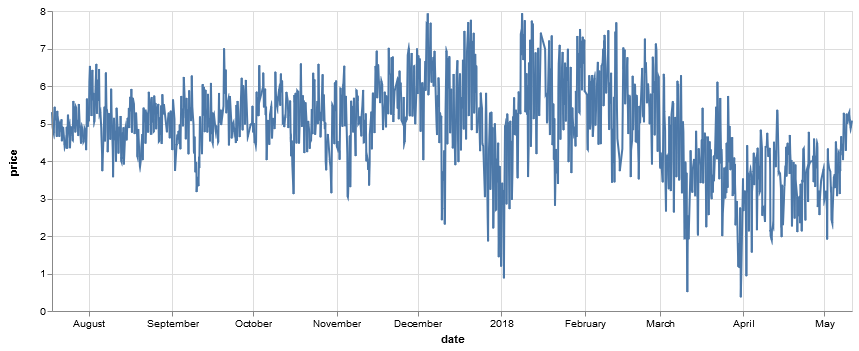

In [118]:
#Predictions plot
alt.Chart(preds).mark_line().encode(
    x="date:T",
    y="price"
).properties(
   width=800
)

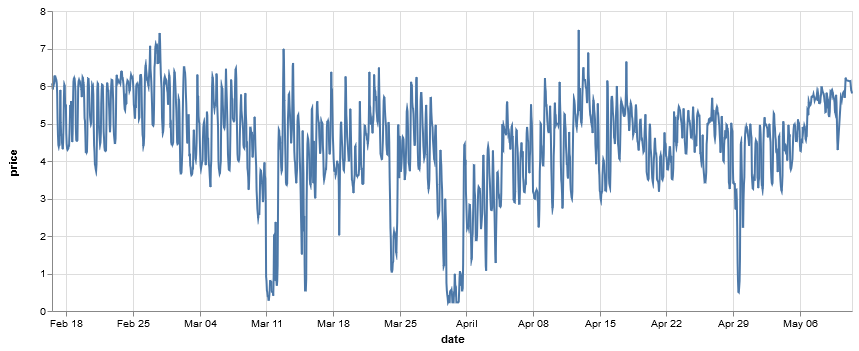

In [110]:
#RealData plot
alt.Chart(realdata).mark_line().encode(
    x="date:T",
    y="price"
).properties(
   width=800
)

In [119]:
pre=preds.merge(realdata,left_on='date',right_on='date',how='inner')
pre.head()

,date,price_x,price_y
0,2018-02-16 21:00:00,6.773245,6.165
1,2018-02-17 00:00:00,5.626979,6.069
2,2018-02-17 06:00:00,4.717245,4.443
3,2018-02-17 08:00:00,5.773138,5.000
4,2018-02-17 10:00:00,5.508122,5.026


In [143]:
pre=pre.rename(columns={"price_x": "predict", "price_y": "real"})

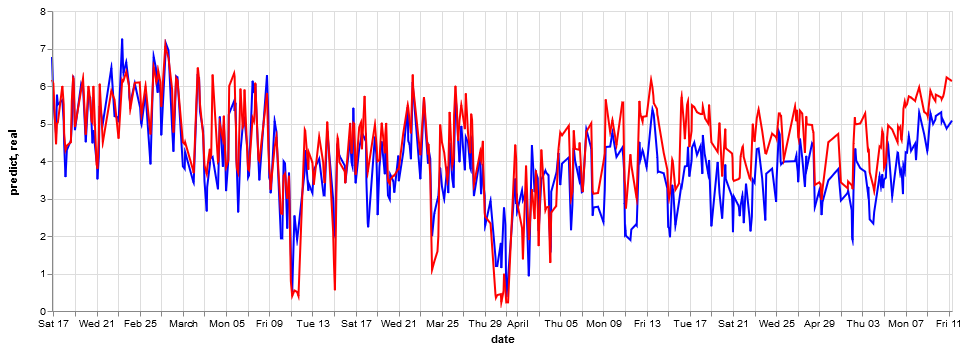

In [155]:
xrange = []
base = alt.Chart(pre.reset_index()).encode(x=alt.X('date', scale=alt.Scale(),
        type="temporal",title="date")) 

alt.layer(
    base.mark_line(color='blue').encode(y='predict'),
    base.mark_line(color='red').encode(y='real')
).properties(
   width=900
)